#  DM Assignment 2 (competition report)
#### Studnt ID: b222904798

#### Name: 黃暐喬

#### Teamname: weichao

### Brief introduction

    I consider the algorithm that we discussed in class, such as "decission tree algorithm" and "naive bayes algorithm". And also with the preprocessing method like BOW(Bag-of-words)and HW1's TF-IDF. However, it seems that deep learning won't get better results in my experiment while working on this assignment. So I choose "naive bayes algorithm in final demo.
    
### Facing problem
    
    When I started to work on this assignment, there are many confusing problems. There's a problem to use jupyter notebook to import keras, and the Tesorflow official obsite also show this problem in Windows system. Then I started running data on kaggle's kennel. However, we trying to upload the data and there was some troubles with json package, then we transform it into csv version but still couldn't. Finally, we found the kaggle competition had already built the dataset! Thanks TA! 
    
### Trying steps

    "Cluster analysis will remain a black art accessible only to thosetrue believers who have experience and great courage." I try BOW_100, BOW_1000, BOW_100000, and get quite different result. Unfortunately, The laptop efficiency is not good enough to provide stability throughput, which caused me need to run several time to try. I try to run training steps on lab's computer when the competiotion end, and get better results. 
    I also try some SVM, TF-ITF, decission tree algorithm and also some Gaussian calculate. There wasn't overfitting problem when I training data. In SVM (support vector machine) algorithm, we can find out a line properly divide the expecting area. Furthermore SVM can deal with the non-linear data too. Similar to KNN approaches we talk in class, SVM needs O(m^2) time to deal with the data. Due to this point when we deal large data, it's too complex to calculate, also waste time. KNN take less time than SVM, however, the results doesn't match my expect. I also use TF-IDF in my learning machine, it's useful and we had already learn in lab1. In my opinion, statistic and data mining will always have a strong link to word frequency. Decission tree algorithm was kind of mass to me. It took me a long time to train but I still can't get the result. I'm still debug now!

    
   
 

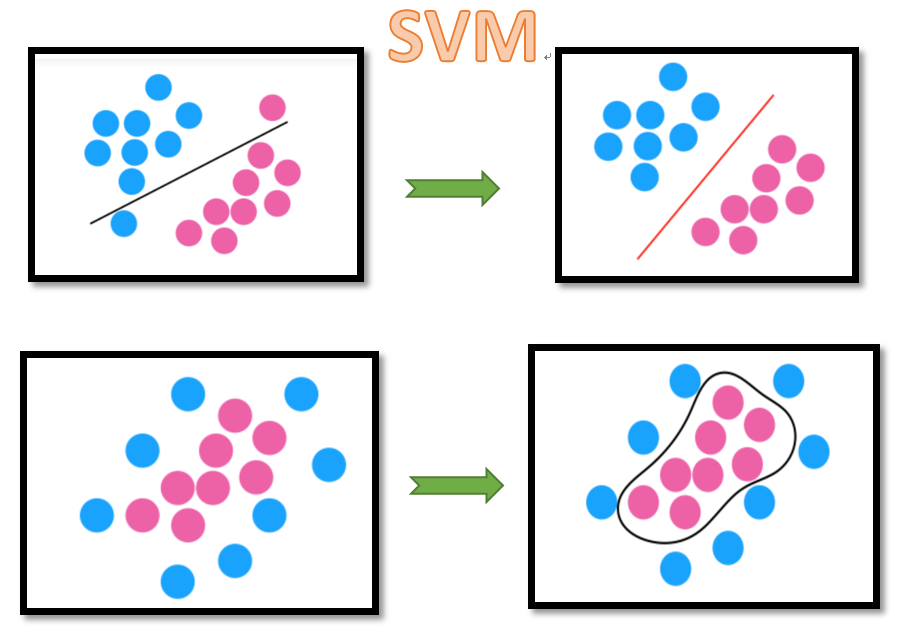
reference--https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-4%E8%AC%9B-%E6%94%AF%E6%8F%B4%E5%90%91%E9%87%8F%E6%A9%9F-support-vector-machine-%E4%BB%8B%E7%B4%B9-9c6c6925856b

## BOW_1000 result

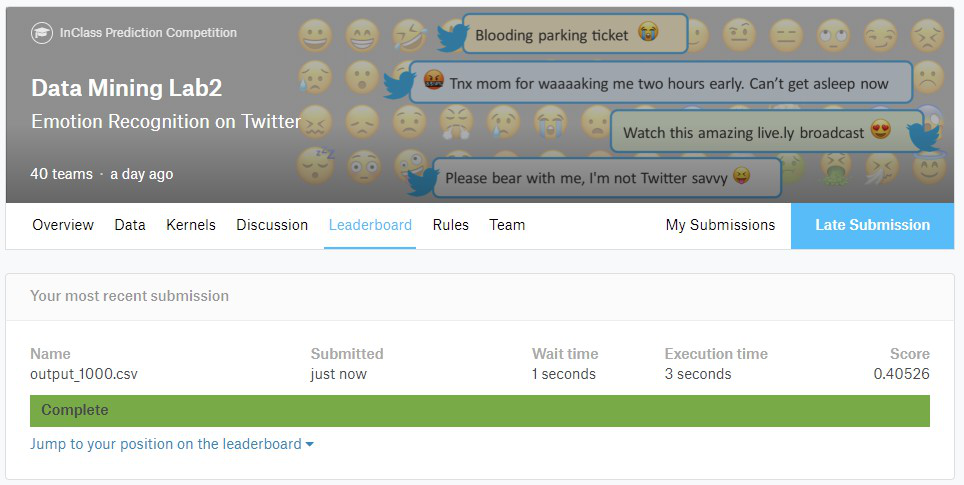

## BOW_500 result

![Image](./image.jpg)

### BOW_100 result competition data in 2018/11

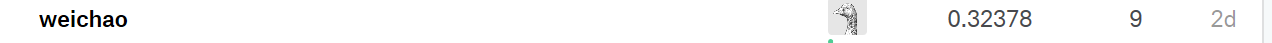

In [1]:
#import the function we need
import numpy as np
import pandas as pd
import os

In [2]:
#load the provided json data
import json
raw_data = []
with open("./tweets_raw.json",'r') as data_file:
    for line in data_file:
        raw_data.append(json.loads(line))

FileNotFoundError: [Errno 2] No such file or directory: './tweets_raw.json'

In [ ]:
#fetch the text ID and put them into raw data
id_list =[]
for i in range (1867535):
    id_list.append(raw_data[i]['_source']['tweet']['tweet_id'])

In [ ]:
text_list =[]
for i in range (1867535):
    text_list.append(raw_data[i]['_source']['tweet']['text'])

In [ ]:
#make a panda dataframe
Tweet_dataframe = pd.DataFrame(id_list,columns=['tweet_id'])

In [ ]:
Tweet_dataframe['text']=text_list

In [ ]:
import pandas as pd
emotion_dataframe = pd.read_csv('./emotion.csv')

In [ ]:
#merge emotion dataframe and tweet dataframe
Tweet_with_emotion=pd.merge(Tweet_dataframe,emotion_dataframe,on='tweet_id',how='left')

In [ ]:
#call the identification data
import pandas as pd
identify = pd.read_csv('./data_identification.csv')
#merge from tweet with emotion dataset to identification dataset with the tweet ID as the key
Tweet_final = pd.merge(Tweet_with_emotion,identify,on='tweet_id',how='left')
#based on the identification colum to spilt dataset into train and test
is_train_df= Tweet_final['identification']== 'train'
train_df = Tweet_final[is_train_df]
is_test_df = Tweet_final['identification']== 'test'
test_df = Tweet_final[is_test_df]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
# build analyzers (bag-of-words)
#Using bag of word method to fetch the feature from text
BOW_100 = CountVectorizer(max_features=100, tokenizer=nltk.word_tokenize) 
#In BOW model, we use text represented as the bag of its words, disregarding grammar but keeping multiplicity.
#The bag-of-words model has also been used for computer vision
# apply analyzer to training data
BOW_100.fit(train_df['text'])

X_train = BOW_100.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_100.transform(test_df['text'])
## check dimension
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

In [ ]:
y_train = train_df['emotion']
from sklearn.naive_bayes import MultinomialNB
#start of naive bayes algorithm!
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

In [ ]:
#predict the data
y_pred = mnb.predict(X_test)

In [ ]:
y_pred_dataframe_one = pd.DataFrame(test_df['tweet_id'],columns=['tweet_id'])
y_pred_dataframe_one['emotion']=y_pred

In [ ]:
y_pred_dataframe_one.to_csv('output.csv',index=False,columns=['tweet_id','emotion'],header=['id','emotion'])
print('output ok!')

### Conclusion
The competition is interesting. Nevertheless, kaggle sometime confuse me a lot. 